# Importing Main Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

# Loading And Spliting Data

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
60000 train samples
10000 test samples


# Data Exploration

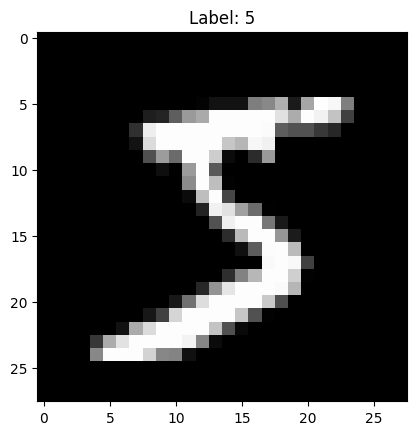

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap="gray")
plt.title(f"Label: {y_train[0]}")
plt.show()

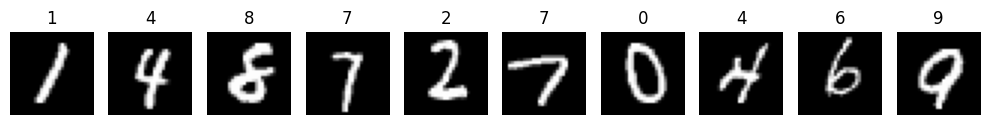

In [5]:
plt.figure(figsize=(10, 2))
for i in range(10):
    idx = np.random.randint(0, x_train.shape[0])
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(str(y_train[idx]))
    plt.axis('off')
plt.tight_layout()
plt.show()

# Data Scaling and Flatten Images

In [6]:

x_train = (x_train / 255.0) * 9
x_test = (x_test / 255.0) * 9


x_train = x_train.reshape(60000, -1)
x_test = x_test.reshape(10000, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")



x_train shape: (60000, 784)
60000 train samples
10000 test samples


# Model Selection Process

### MODEL 1

In [7]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),  # Hidden layer
    keras.layers.Dense(10, activation='softmax')                     # Output layer
])
model.summary()

C:\Users\omar_\anaconda3\envs\PYTHON_PRACTICING\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])


In [9]:
from tensorflow.keras.callbacks import EarlyStopping


early_stop = EarlyStopping(
    monitor='val_loss',    
    patience=3,            
    restore_best_weights=True
)

In [10]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8612 - loss: 0.4967 - val_accuracy: 0.9538 - val_loss: 0.1534
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9583 - loss: 0.1444 - val_accuracy: 0.9611 - val_loss: 0.1274
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9693 - loss: 0.1079 - val_accuracy: 0.9684 - val_loss: 0.1078
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9760 - loss: 0.0812 - val_accuracy: 0.9693 - val_loss: 0.1024
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9813 - loss: 0.0635 - val_accuracy: 0.9729 - val_loss: 0.0918
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9842 - loss: 0.0537 - val_accuracy: 0.9717 - val_loss: 0.0912
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9871 - loss: 0.0474 - val_accuracy: 0.9715 - val_loss: 0.0932
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9885 - loss: 0.0406

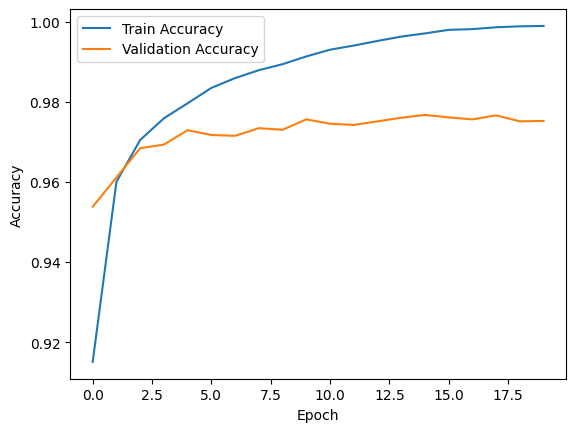

In [11]:

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import classification_report
import numpy as np


y_pred = np.argmax(model.predict(x_test), axis=1)



print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.97      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### MODEL 2

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier




ovo_clf = OneVsOneClassifier(LogisticRegression(max_iter=1000))
ovo_clf.fit(x_train, y_train)

y_pred = ovo_clf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.93      0.90      0.92      1032
           3       0.90      0.93      0.91      1010
           4       0.94      0.95      0.94       982
           5       0.89      0.88      0.89       892
           6       0.95      0.95      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.90      0.90      0.90       974
           9       0.92      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [14]:
!git add preprocessing.ipynb
!git commit -m "Preprocessing Notebook Added"
!git push


[main 35ffeaf] Preprocessing Notebook Added
 1 file changed, 501 insertions(+)


remote: Permission to MohammadDaadour/MNIST-Digit-Classification.git denied to Omar-Mahrous-am.
fatal: unable to access 'https://github.com/MohammadDaadour/MNIST-Digit-Classification/': The requested URL returned error: 403
